<a href="https://colab.research.google.com/github/dtnovak26/ME239/blob/homeworkUploads/ME239_HW13_novak104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(lecture13:homework)=
# Homework 13

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

```{note}
+ Please match all the pages corresponding to each of the questions when you submit on gradescope.
```

## Student details

+ **First Name:** Drew
+ **Last Name:** Novak
+ **Email:** novak104@purdue.edu

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')
import numpy as np
import scipy.stats as st

/tmp/ipython-input-122018214.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', 'svg')


## Problem 1 - Maximum likelihood estimate of an Exponential random variable

You are managing toll station and your job is to come up with a probabilistic model for the time that passes between car arrivals.
You have at your disposal data:

$$
T_{1:N} = (t_1, t_2, \dots, t_N).
$$

Here $t_1$ is the time that passed until the first event, $t_2$ is the time that passed from the first event to the second, and so on.
You decide to model these random time intervals using an Exponential distribution with uknown rate parameter $\lambda$, i.e.,

$$
T_i | \lambda \sim \text{Exponential}(\lambda).
$$

In terms of the PDF:

$$
p(t_i | \lambda) = \lambda e^{-\lambda t_i}.
$$

You have decided to use maximum likelihood to fit the parameter $\lambda$.
Answer the following questions:

+ Find the mathematical form of the likelihood of the data $p(t_{1:N}|\lambda)$.

**Answer:** Started with finding the joint likelyhood $L(\lambda)$ in simplest form.
$$L(\lambda) = p(t_{1:N}|\lambda) = \prod_{i=1}^{N} p(t_i|\lambda)$$

Substitude the PDF as given above:
$$L(\lambda) = \prod_{i=1}^{N} (\lambda e^{-\lambda t_i})$$

This can be simplified by the Lambda terms and exponential terms being grouped using a power of N and summation. Final answer:

$$L(\lambda) = \lambda^N e^{-\lambda \sum_{i=1}^{N} t_i}$$
<br><br><br><br><br><br>

+ Find the mathematical form of the log-likelihood $J(\lambda) = \log p(t_{1:N}|\lambda)$.

**Answer:** Started with taking the log of the likelihood function as shown in instruction above.

$$J(\lambda) = \log \left( \lambda^N e^{-\lambda \sum_{i=1}^{N} t_i} \right)$$

Split up the lambda and exponential terms using properties of logrithms and simplify. N gets moved in front, exponential and log cancel out leaving a final answer of:

$$J(\lambda) = N \log(\lambda) - \lambda \sum_{i=1}^{N} t_i$$

You could also use ln for this, I think it should have the same results as the log for the $N\log(\lambda)$ term. I just used log as that is what the instructions reccomend : )
<br><br><br><br><br><br>

+ Take the derivative $\frac{dJ(\lambda)}{d\lambda}$ of $J(\lambda)$ with respect to $\lambda$.

**Answer:** Differentiate the whole function as shown:
$$\frac{d}{d\lambda} \left[ N \log(\lambda) - \lambda \sum_{i=1}^{N} t_i \right]$$

Take derivative, summation left basically unaffected due to $\lambda$ being only on the outside. relatively simple final answer as shown:

$$\frac{dJ(\lambda)}{d\lambda} = \frac{N}{\lambda} - \sum_{i=1}^{N} t_i$$
<br><br><br><br><br><br>

+ Find the MLE $\hat{\lambda}$ by solving the equation $\frac{dJ(\lambda)}{d\lambda} = 0$ for $\lambda$.

**Answer:** Simply rearrange the derivative for lambda, divide the N term by the summation. Final answer shown:

$$\lambda = \frac{N}{\sum_{i=1}^{N} t_i}$$

*Note: I have no clue why in the latex the final end bracket is red, its displaying right and everything matches, I think it might be a glitch with colab.*

<br><br><br><br><br><br>

## Problem 2 - Failure of a mechanical component

Assume that you designing a gear for a mechanical system.
Under normal operating conditions the gear is expected to fail at a random time.
Let $T$ be a random variable capturing the time the gear fails.
What should the probability density of $T$ look like?
Well, when the gear is brand new, the probability density should be close to zero because a new gear does not fail under normal opearating conditions.
As time goes by, the probability density should increase because various things start happening to the material, e.g., crack formation, fatigue, etc.
Finally, the probability density must again start going to zero as time further increases because nothing lasts forever...
A probability distribution that is commonly used to model this situation is the [Weibull](https://en.wikipedia.org/wiki/Weibull_distribution).
We are going to fit some fail time data to a Weibull distribution and then you will have to answer a few questions about failing times.

In [6]:
# Time to fail in years under normal operating conditions
# Each row is a different gear
time_to_fail_data = np.array([
    10.5,
    7.5,
    8.1,
    8.4,
    11.2,
    9.3,
    8.9,
    12.4
])

Here is a Weibull distribution fitted to the data using maximum likelihood:

In [7]:
fitted_params = st.exponweib.fit(time_to_fail_data, loc=0)
T = st.exponweib(*fitted_params)

Let's plot the probability density of this:

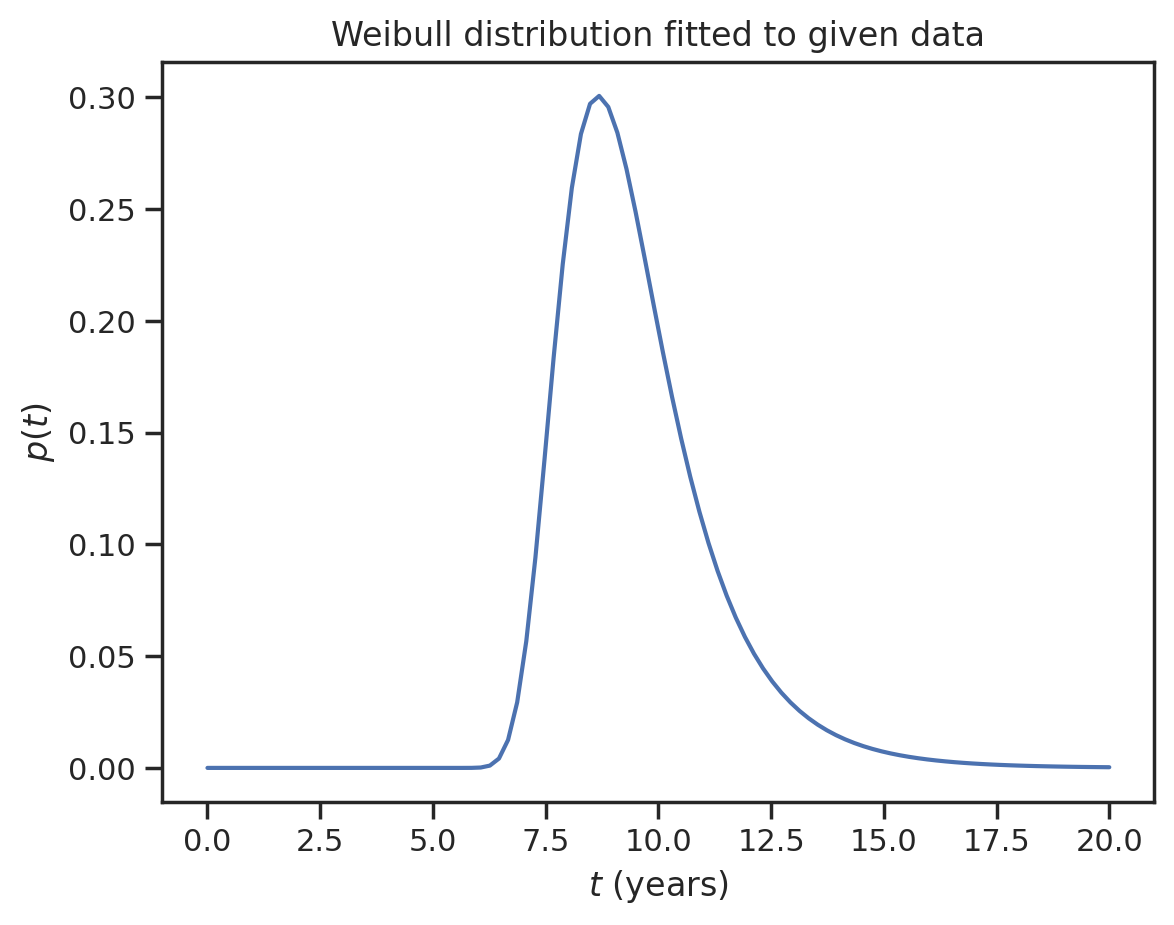

In [8]:
fig, ax = plt.subplots(dpi=100)
ts = np.linspace(0.0, 20.0, 100)
ax.plot(ts, T.pdf(ts))
ax.set_xlabel('$t$ (years)')
ax.set_ylabel('$p(t)$');
# Adding a title for formality sake : )
ax.set_title('Weibull distribution fitted to given data');

+ Find the mean fail time and its variance.
Hint: Do not integrate anything by hand. Just use the functionality of ``scipy.stats``.

In [9]:
# Your code here
t_mean = T.mean() # Replaced using scipy
t_var = T.var()
print(f'E[T] = {t_mean:1.2f}')
print(f'V[T] = {t_var:1.2f}')

E[T] = 9.53
V[T] = 2.88


+ Plot the cumulative distribution function of $T$.

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-1861835746.py:6: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('$P(T \leq t)$');


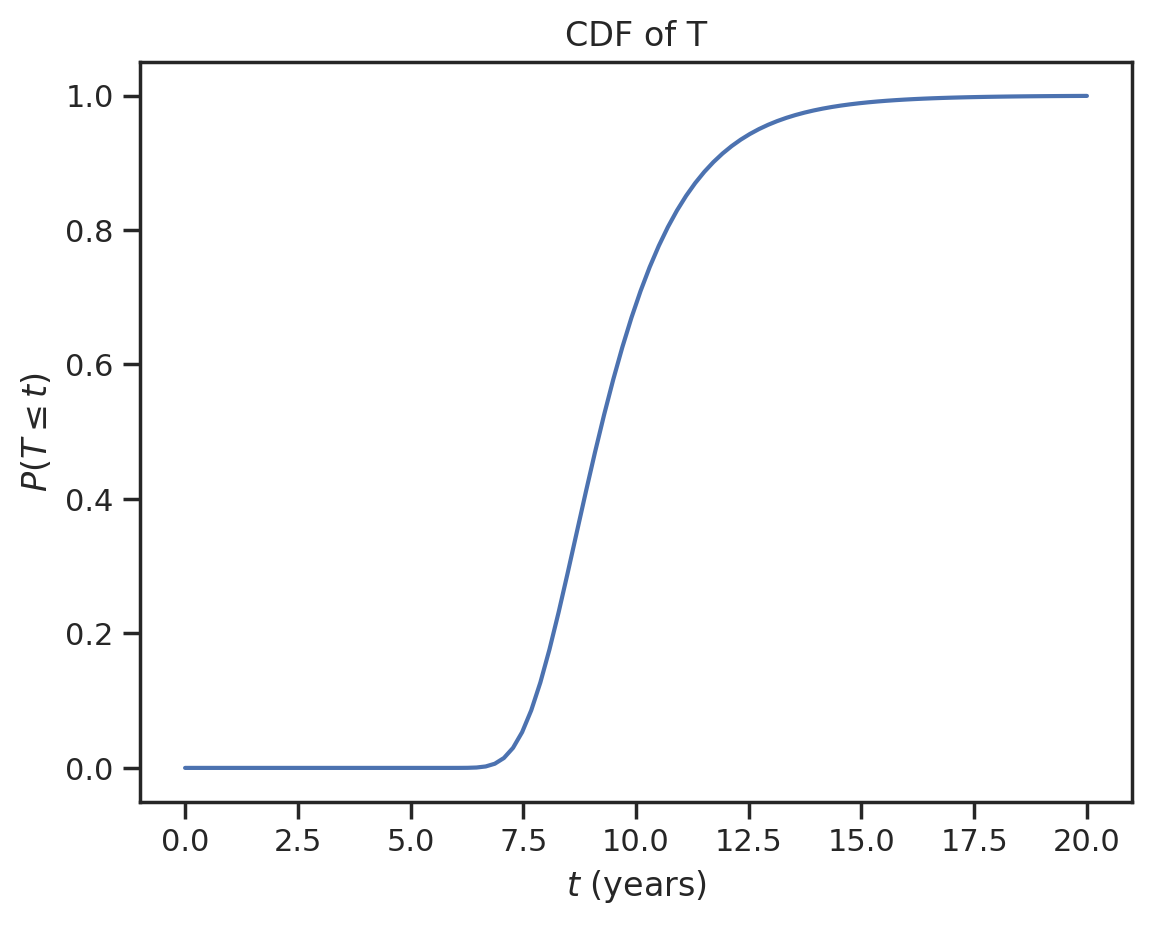

In [10]:
# Basing this off the graph above for consistency
fig, ax = plt.subplots(dpi=100)
ts = np.linspace(0.0, 20.0, 100)
ax.plot(ts, T.cdf(ts))
ax.set_xlabel('$t$ (years)')
ax.set_ylabel('$P(T \leq t)$');
ax.set_title('CDF of T');

+ Plot the probability that gear survives for more than $t$ as a function of $t$.
That is, plot the function:

$$
S(t) = p(T > t).
$$

Hint: First express this function in terms of the cumulative distribution function of $T$.

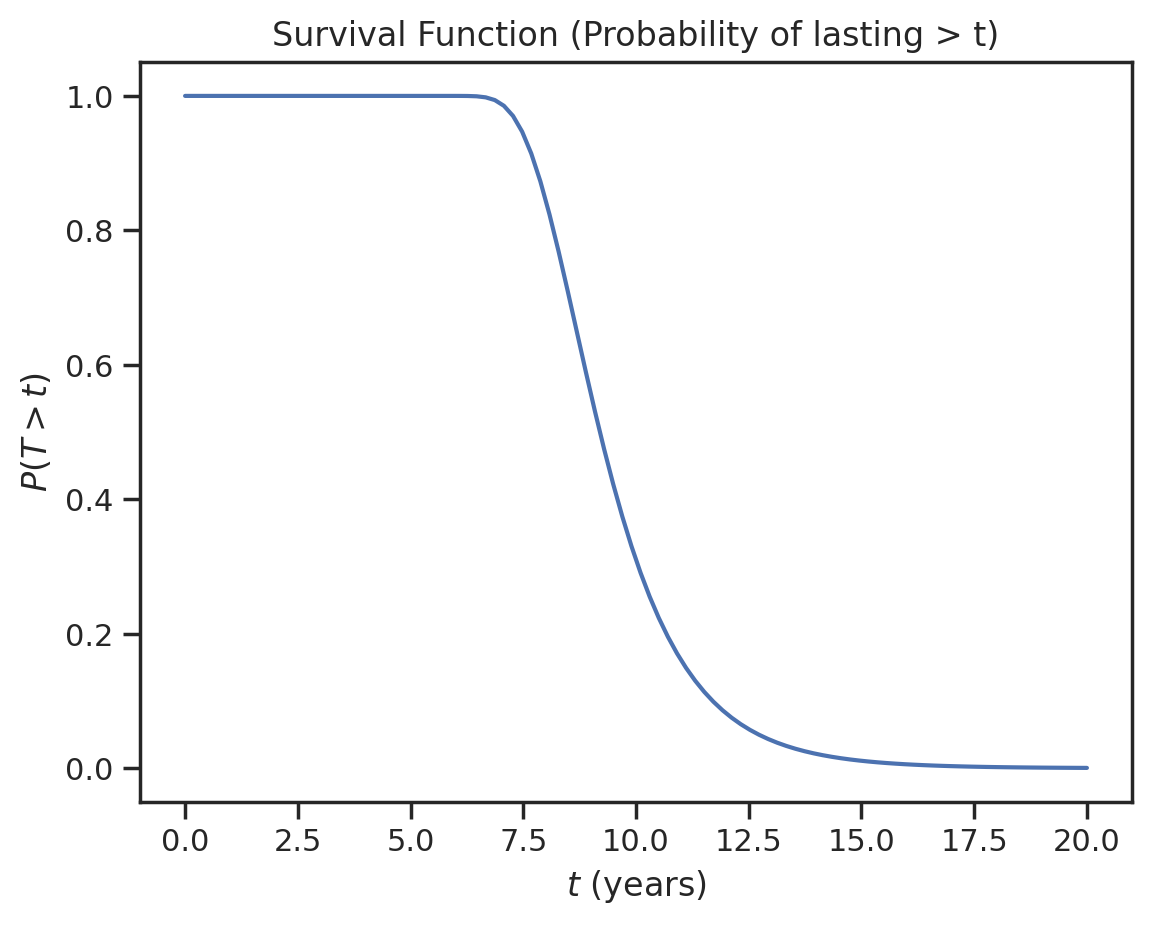

In [11]:
# Plotting in terms of the CDF plotted above
fig, ax = plt.subplots(dpi=100)
ts = np.linspace(0.0, 20.0, 100)

#* survProb = T.sf(ts)
survProb = 1 - T.cdf(ts)

ax.plot(ts, survProb)
ax.set_title('Survival Function (Probability of lasting > t)')
ax.set_xlabel('$t$ (years)')
ax.set_ylabel('$P(T > t)$');
plt.show()

#* Interesting sidenote, scipy has an implementation of this
# instead of using 1 - cdf, you coul use .sf() function, yields same result

+ Find the probability that the gear lasts anywhere between 8 and 10 years.

In [17]:
# Specifically looking for P( 8 , T < 10)

p_8_10 = T.cdf(8) - T.cdf(0)

print(f'The probability that the gear lasts anywhere between 8 and 10 years is: {p_8_10:1.2f}')

The probability that the gear lasts anywhere between 8 and 10 years is: 0.16


+ If you were to sell the gear, how many years "warranty" would you offer and why?

**Answer:**

If you wanted to make the most money, having around an 8 year warranty would make it a decently long amount of time (incentivising people to buy your product) while only having a small (16%) chance of failure. If you made it longer like 10 years there would be over a 50% chance of failure and you would probably lose money as a business.

This being said, it would be great if you could make a 20 year warranty and cover everything : ) But this is unfortuanetly not economical : (
<br><br><br><br><br><br>

Run the following code to convert the notebook to a pdf. Verify that the file path to the notebook is correct.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!apt-get install inkscape texlive texlive-xetex texlive-latex-extra pandoc --quiet
!pip install pypandoc --quiet
!jupyter nbconvert --to PDF '/content/drive/MyDrive/Colab Notebooks/ME239_HW13_novak104.ipynb'